In [1]:
# Import required libraries
import numpy as np  # Standard convention for numpy
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# b) Load and preprocess the dataset
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)

In [3]:

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data.values)
y = X  # For autoencoder, X is both input and target output

# Split the data into training and test sets
X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)
input_dim = X_train.shape[1]
print("Input dimension:", input_dim)

Input dimension: 141


In [4]:
# c) Define the Encoder
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu")  # Latent representation size = 8
])


In [5]:
# d) Define the Decoder
decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(input_dim, activation="linear")  # Output size matches input dimension
])

In [6]:
# Combine Encoder and Decoder into the Autoencoder model
autoencoder = models.Sequential([encoder, decoder])


In [7]:
# e) Compile the model
autoencoder.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

# Train the Autoencoder
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0102 - loss: 0.9097 - val_accuracy: 0.0213 - val_loss: 0.5203
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0221 - loss: 0.5100 - val_accuracy: 0.0725 - val_loss: 0.3898
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0892 - loss: 0.3565 - val_accuracy: 0.0925 - val_loss: 0.2924
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1005 - loss: 0.3108 - val_accuracy: 0.1037 - val_loss: 0.2702
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1192 - loss: 0.2569 - val_accuracy: 0.1125 - val_loss: 0.2345
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1254 - loss: 0.2415 - val_accuracy: 0.1262 - val_loss: 0.2125
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1176 - loss: 0.2110 - val_accuracy: 0.1150 - val_loss: 0.1998
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1270 - loss: 0.2093 - val_accuracy: 0.

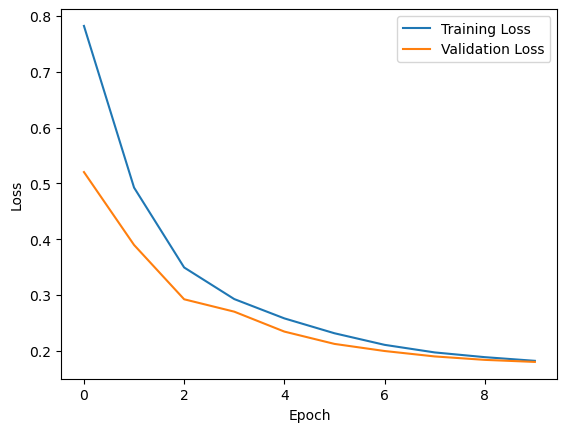

In [15]:

# Plot training history for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [17]:
# Predict on the test set
y_pred = autoencoder.predict(X_test)

# Calculate Mean Squared Error (MSE) for each instance in the test set
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [19]:
# Determine the anomaly threshold at the 95th percentile of MSE values
threshold = np.percentile(mse, 95)
print("Anomaly detection threshold (95th percentile):", threshold)


Anomaly detection threshold (95th percentile): 0.522949126870143


In [21]:
# Identify anomalies based on the threshold
anomalies = mse > threshold

In [23]:



# Count the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")

Number of anomalies detected: 50
